In [13]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.datasets import load_iris

In [27]:
# Load the Iris dataset
df = pd.read_csv(r"C:\Users\goura\OneDrive\Desktop\PythonProjects\kNN\Iris.csv")

In [29]:
# Drop the Id column and extract features
X = df.drop(columns=["Id", "Species"])
y_true = df["Species"]

In [31]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Apply EM using Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

In [35]:
# Optional: Map clusters to original labels for comparison
species_map = {label: species for label, species in zip(np.unique(labels), np.unique(y_true))}
mapped_labels = [species_map[label] for label in labels]

In [37]:
# Evaluate clustering (optional)
ari_score = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index (Clustering Accuracy): {ari_score:.2f}")

Adjusted Rand Index (Clustering Accuracy): 0.43


In [39]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

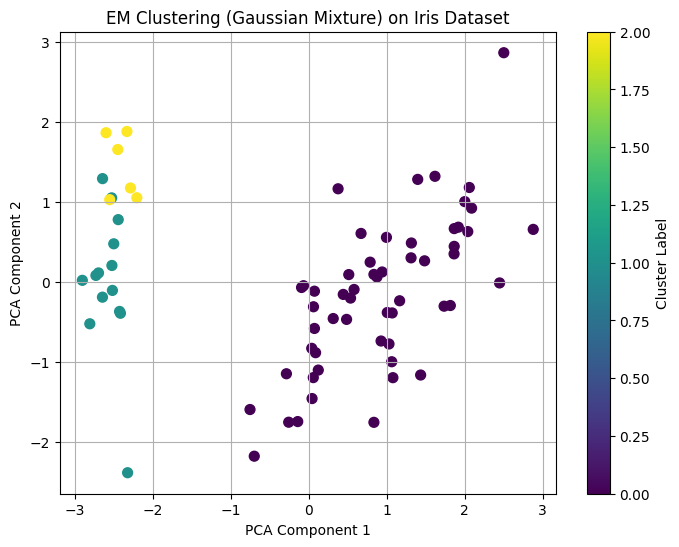

In [41]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("EM Clustering (Gaussian Mixture) on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()